In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [7]:
# Calculate the repetition rate and number of feature points, 
# and take the average direction under different degrees of transformation
def get_visual_average(path_dataset,model,trans_type,direction=None,degree=None):
    list_rep={}
    list_num={}
    x=['05','10','15','20','25','30','35','40','45']
    # How much data does the entire dataset contain
    data_count=0
    # Each image
    for filename in os.listdir(path_dataset):
        temp = path_dataset+filename+'/'
        # print(temp)

        # Each transformation
        for typee in os.listdir(temp):
            # print(typee)

            # Split the file name, attribute_list[0] is the transformation type, 
            # attribute_list[1] is the transformation direction, 
            # and attribute_list[2] is the transformation degree
            attribute_list = typee.split('_')
            degree_temp = attribute_list[2]
            data_count = data_count+1
            dir_temp = temp+typee+'/'
            # print(dir_temp)


            # Read the results of each model
            for modell in model:
                # print(modell)
                output_dir = dir_temp+modell+'_result/'
                rep = output_dir+'rep.txt'
                kp_num = output_dir+'kp_num.txt'


                rep = np.loadtxt(rep,dtype=np.float32, delimiter=' ')
                num = np.loadtxt(kp_num,dtype=np.float32, delimiter=' ')


                # statistics R_avg
                if modell not in list_rep:
                    list_rep[modell]={}
                if degree_temp not in list_rep[modell]:
                    list_rep[modell][degree_temp]=rep.item()
                else:
                    list_rep[modell][degree_temp] = list_rep[modell][degree_temp]+rep.item()


                # statistics keypoints num
                if modell not in list_num:
                    list_num[modell]={}
                if degree_temp not in list_num[modell]:
                    list_num[modell][degree_temp]=num.item()
                else:
                    list_num[modell][degree_temp]=list_num[modell][degree_temp]+num.item()


    # just got the sum in the direction, now need to calculate the average
    list_rep_average = {}
    list_num_average = {}


    for modell in model:
        list_rep_average[modell]=[]
        list_num_average[modell]=[]

        for degreee in list_rep[modell]:
            list_rep_average[modell].append(list_rep[modell][degreee]/(data_count/9))
        for degreee in list_num[modell]:
            list_num_average[modell].append(list_num[modell][degreee]/(data_count/9))
    # print(list_rep_average)

    
    # draw a curve
    plt.figure(figsize=(10,4),dpi=300)


    # R_avg
    plt.subplot(1,2,1)
    if 'orb' in model:
        plt.plot(x, list_rep_average['orb'], marker='o', linestyle='-', color='blue', label='ORB')
    if 'sift' in model:
        plt.plot(x, list_rep_average['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
    if 'superpoint' in model:
        plt.plot(x, list_rep_average['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
    if 'rekd' in model:
        plt.plot(x, list_rep_average['rekd'], marker='^', linestyle='-', color='red', label='REKD')
    if 'keynet' in model:
        plt.plot(x, list_rep_average['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')
    
    
    # plt.title('R')
    plt.xlabel('θ')
    plt.ylabel('R_avg')
    plt.ylim(0, 100)
    plt.legend()
    

    # keypoint num
    plt.subplot(1,2,2)
    if 'orb' in model:
        plt.plot(x, list_num_average['orb'], marker='o', linestyle='-', color='blue', label='ORB')
    if 'sift' in model:
        plt.plot(x, list_num_average['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
    if 'superpoint' in model:
        plt.plot(x, list_num_average['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
    if 'rekd' in model:
        plt.plot(x, list_num_average['rekd'], marker='^', linestyle='-', color='red', label='REKD')
    if 'keynet' in model:
        plt.plot(x, list_num_average['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')


    # plt.title('num')
    plt.xlabel('θ')
    plt.ylabel('Keypoint Num')
    plt.legend()


    plt.show()
    return list_rep_average,list_num_average

In [3]:
path_dataset = 'dataset_res/'
model = ['orb','sift','superpoint','rekd','keynet']

# The horizontal axis represents the degree of transform, and the average is taken for all directions of all images

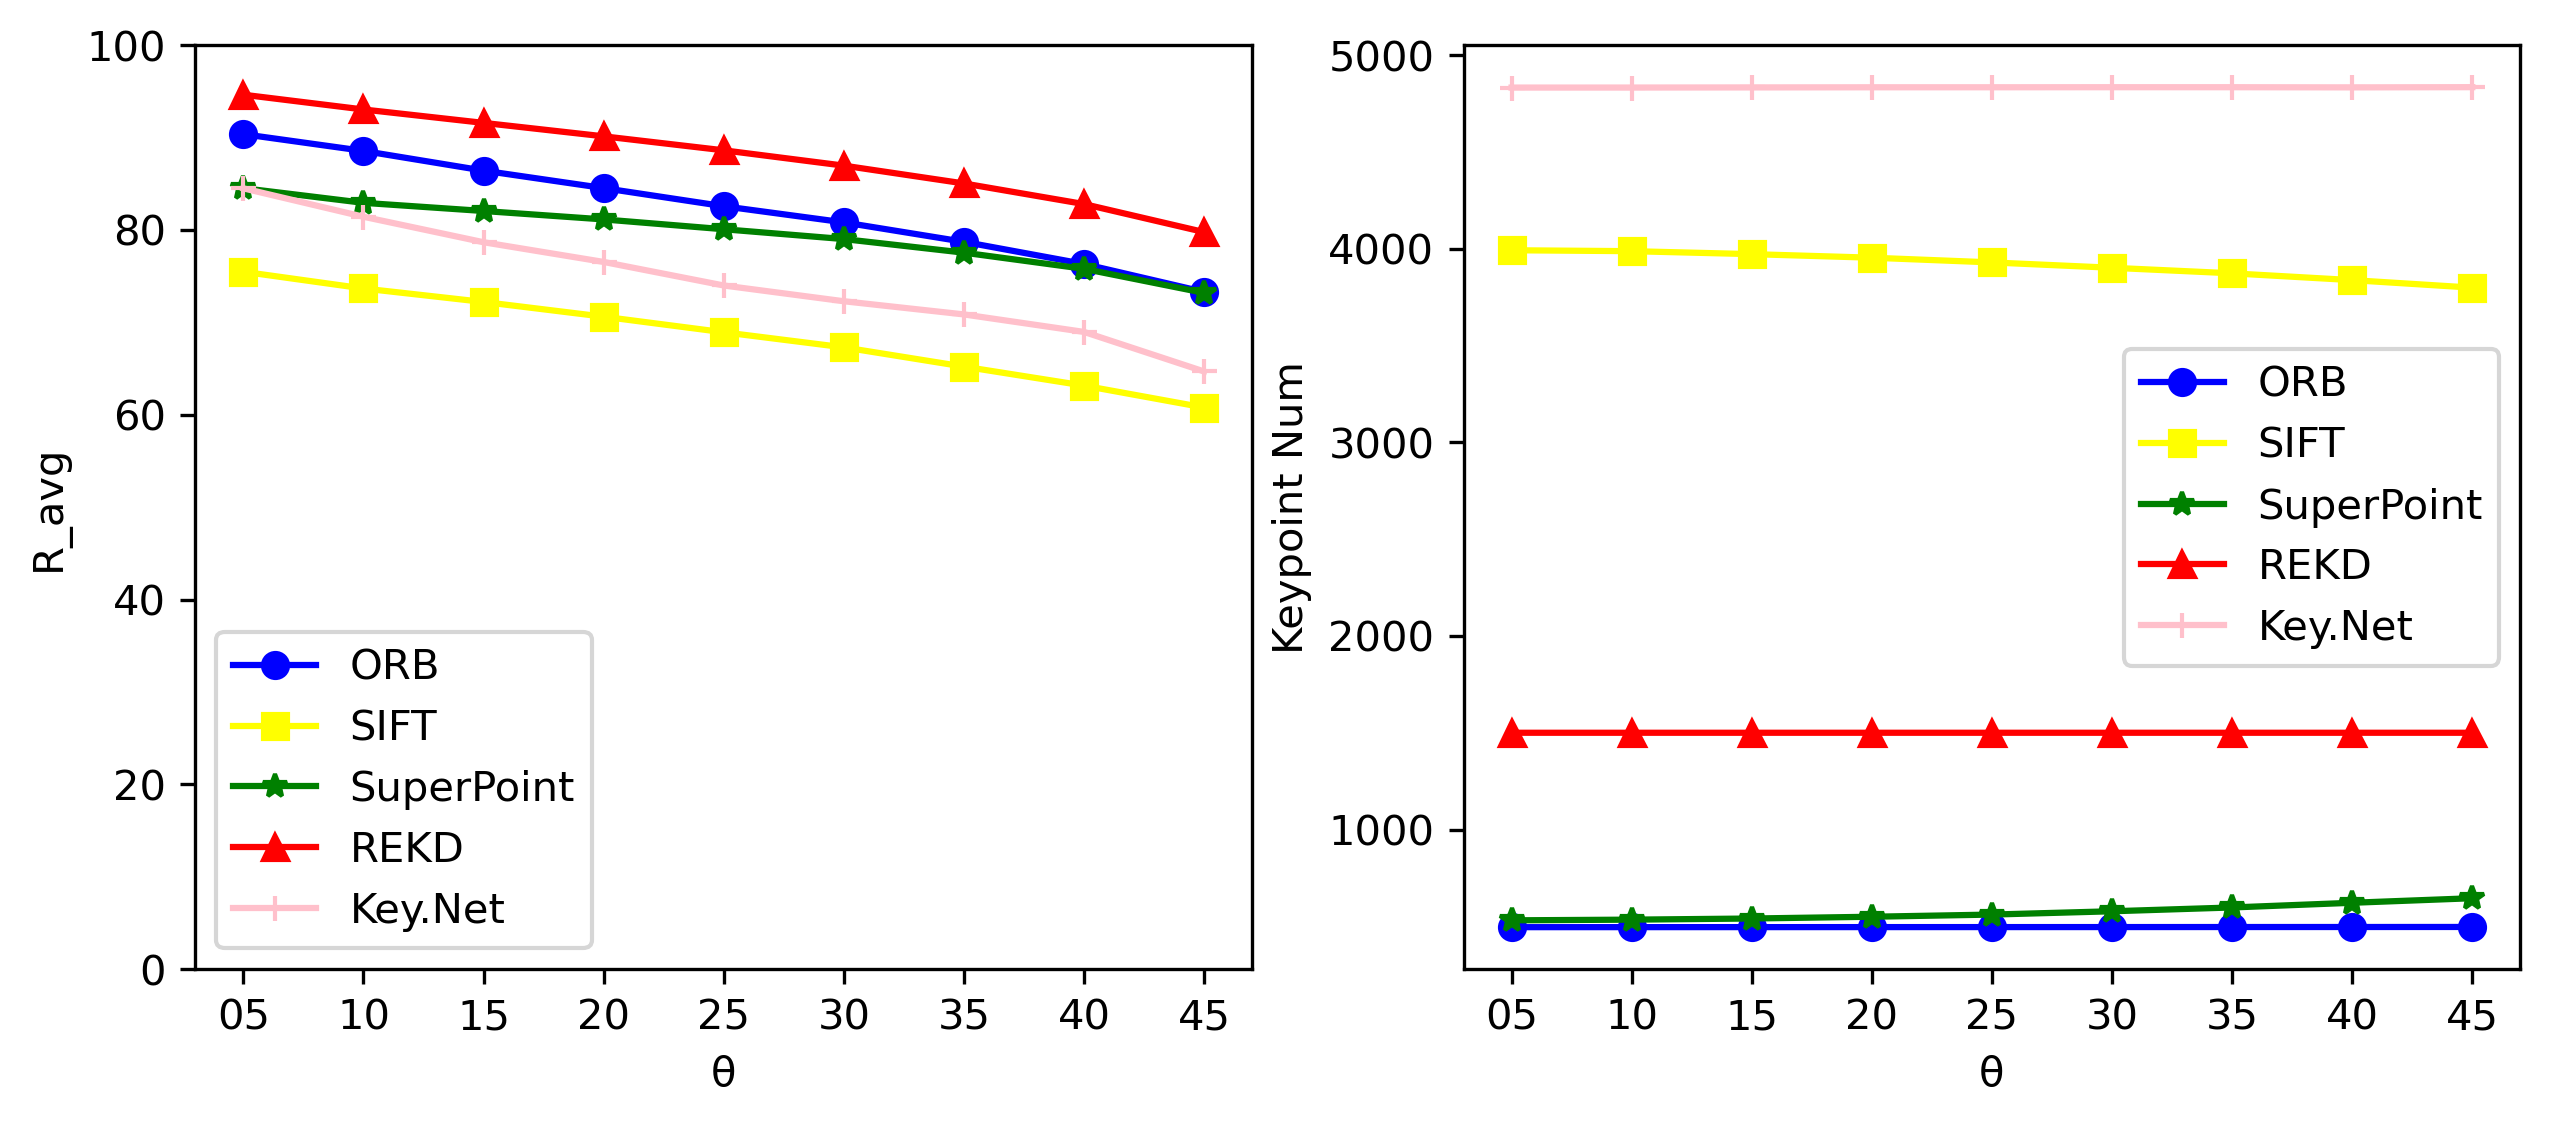

In [8]:
trans_type = 'perspective'
direction = None
degree = None

list_rep_average,list_num_average = get_visual_average(path_dataset,model,trans_type,direction,degree)

In [5]:
print(list_rep_average)

{'orb': [90.36747044563293, 88.55672174453736, 86.42346493721008, 84.53118860006333, 82.56932429790497, 80.82129961967468, 78.71647249579429, 76.3197264689207, 73.29209956645965], 'sift': [75.47840807914734, 73.66767042160035, 72.20875047206879, 70.61373824596404, 68.92978796958923, 67.29589852809906, 65.21197146892547, 63.155051808357236, 60.78579962730408], 'superpoint': [84.52266565322876, 82.9373611164093, 82.05309023857117, 81.14132214546204, 80.07846195697785, 79.0148184299469, 77.544366979599, 75.79296977043151, 73.18982421875], 'rekd': [94.63740033149719, 93.038786277771, 91.58821452140808, 90.13469652175904, 88.62031311988831, 86.96326974868775, 85.03476665496827, 82.80240747928619, 79.7704392194748], 'keynet': [84.50441911220551, 81.4312051486969, 78.67262594223023, 76.53987420082092, 73.99143486022949, 72.28536721229553, 70.8604144334793, 68.96604396104813, 64.68534991264343]}


In [9]:
print(list_num_average)

{'orb': [495.711875, 495.85125, 495.9275, 496.068125, 496.155, 496.236875, 496.425, 496.56125, 496.763125], 'sift': [3992.601875, 3987.846875, 3972.53, 3954.14, 3929.7625, 3902.076875, 3873.435625, 3838.28125, 3799.3175], 'superpoint': [531.05375, 534.558125, 540.41125, 549.581875, 560.760625, 577.855, 597.483125, 621.734375, 645.25875], 'rekd': [1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1499.995], 'keynet': [4832.965, 4833.11, 4833.75625, 4834.449375, 4834.528125, 4834.854375, 4834.808125, 4833.979375, 4835.059375]}


# Only traditional methods

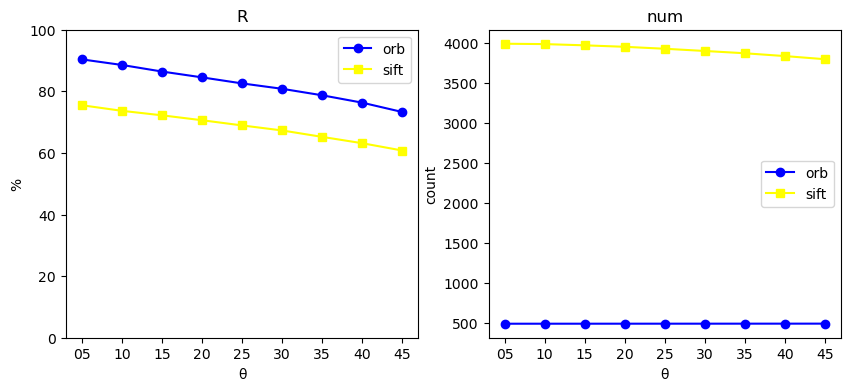

In [5]:
model = ['orb','sift']
trans_type = 'perspective'
direction = None
degree = None

list_rep_average = get_visual_average(path_dataset,model,trans_type,direction,degree)

# Only deep learning methods

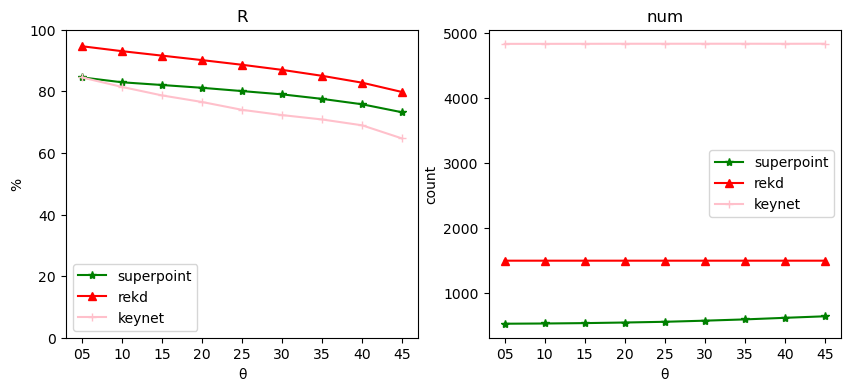

In [6]:
model = ['superpoint','rekd','keynet']
trans_type = 'perspective'
direction = None
degree = None

list_rep_average = get_visual_average(path_dataset,model,trans_type,direction,degree)

# Calculate the gradient of descent

{'orb': [90.36747044563293, 88.55672174453736, 86.42346493721008, 84.53118860006333, 82.56932429790497, 80.82129961967468, 78.71647249579429, 76.3197264689207, 73.29209956645965], 'sift': [75.47840807914734, 73.66767042160035, 72.20875047206879, 70.61373824596404, 68.92978796958923, 67.29589852809906, 65.21197146892547, 63.155051808357236, 60.78579962730408], 'superpoint': [84.52266565322876, 82.9373611164093, 82.05309023857117, 81.14132214546204, 80.07846195697785, 79.0148184299469, 77.544366979599, 75.79296977043151, 73.18982421875], 'rekd': [94.63740033149719, 93.038786277771, 91.58821452140808, 90.13469652175904, 88.62031311988831, 86.96326974868775, 85.03476665496827, 82.80240747928619, 79.7704392194748], 'keynet': [84.50441911220551, 81.4312051486969, 78.67262594223023, 76.53987420082092, 73.99143486022949, 72.28536721229553, 70.8604144334793, 68.96604396104813, 64.68534991264343]}
17.075370879173278
14.692608451843263
11.332841434478752
14.866961112022395
19.81906919956208


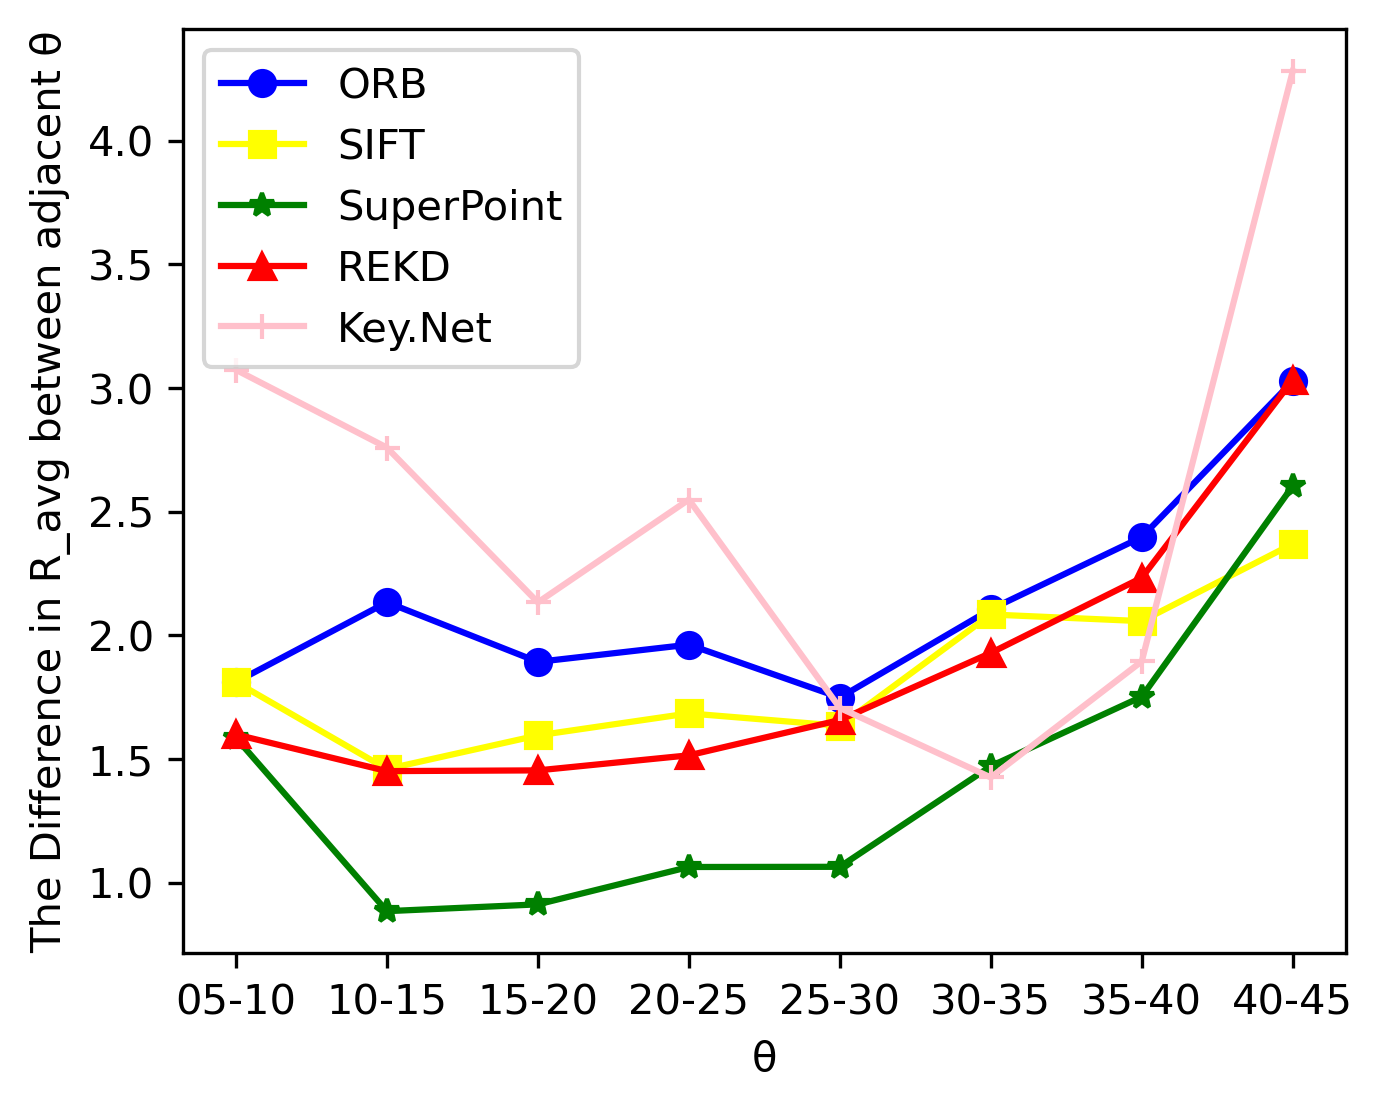

In [6]:
model = ['orb','sift','superpoint','rekd','keynet']
print(list_rep_average)
list_rep_average_gradient = {}
for modell in list_rep_average:
    list_rep_average_gradient[modell]=[]
    temp_list = list_rep_average.get(modell)
    temp_sum=0
    # For each method, calculate the difference between adjacent transformation degrees (taking the average for the direction)
    for i in range(1,len(temp_list)):
        list_rep_average_gradient[modell].append(temp_list[i-1]-temp_list[i])
        temp_sum = temp_sum + temp_list[i-1]-temp_list[i]
    print(temp_sum)

    
# draw a curve
plt.figure(figsize=(5,4),dpi=300)
x=['05-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45']


if 'orb' in model:
    plt.plot(x, list_rep_average_gradient['orb'], marker='o', linestyle='-', color='blue', label='ORB')
if 'sift' in model:
    plt.plot(x, list_rep_average_gradient['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
if 'superpoint' in model:
    plt.plot(x, list_rep_average_gradient['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
if 'rekd' in model:
    plt.plot(x, list_rep_average_gradient['rekd'], marker='^', linestyle='-', color='red', label='REKD')
if 'keynet' in model:
    plt.plot(x, list_rep_average_gradient['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')


# plt.title('rep_gradient')
plt.xlabel('θ')
plt.ylabel('The Difference in R_avg between adjacent θ')


plt.legend()
plt.show()